In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Flatten, LSTM, GRU, Dense, SimpleRNN, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
T = 10
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,-1, -2, -3)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [5]:
i = Input(shape = (T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

In [6]:
r = model.fit(X,Y,epochs=100,validation_split=0.5,steps_per_epoch=2500)

Epoch 1/100
2500/2500 [==============================] - 9s 2ms/step - loss: 0.7259 - accuracy: 0.4972 - val_loss: 0.7044 - val_accuracy: 0.5044
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7078 - accuracy: 0.5004 - val_loss: 0.7128 - val_accuracy: 0.4864
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7043 - accuracy: 0.5008 - val_loss: 0.7051 - val_accuracy: 0.5024
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7048 - accuracy: 0.5144 - val_loss: 0.7017 - val_accuracy: 0.4976
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7098 - accuracy: 0.4856 - val_loss: 0.7032 - val_accuracy: 0.4968
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7083 - accuracy: 0.4844 - val_loss: 0.7002 - val_accuracy: 0.5020
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7055 - accuracy: 0.5052 - val_loss: 0.7125 - val_ac

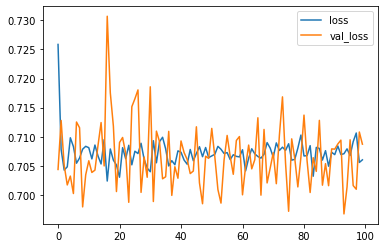

In [7]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

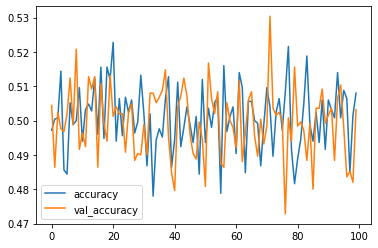

In [8]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [15]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

In [16]:
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.6955 - accuracy: 0.5172 - val_loss: 0.6831 - val_accuracy: 0.5560
Epoch 2/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6684 - accuracy: 0.6084 - val_loss: 0.6518 - val_accuracy: 0.6540
Epoch 3/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6285 - accuracy: 0.6948 - val_loss: 0.6076 - val_accuracy: 0.7020
Epoch 4/200
79/79 [==============================] - 1s 14ms/step - loss: 0.5704 - accuracy: 0.7536 - val_loss: 0.5373 - val_accuracy: 0.7860
Epoch 5/200
79/79 [==============================] - 1s 14ms/step - loss: 0.4949 - accuracy: 0.8084 - val_loss: 0.4659 - val_accuracy: 0.8216
Epoch 6/200
79/79 [==============================] - 1s 14ms/step - loss: 0.4332 - accuracy: 0.8416 - val_loss: 0.4146 - val_accuracy: 0.8468
Epoch 7/200
79/79 [==============================] - 1s 14ms/step - loss: 0.3920 - accuracy: 0.8552 - val_loss: 0.3814 - val_accuracy: 0.8564
Epoch 

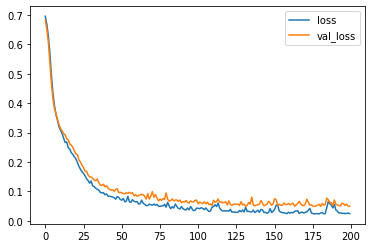

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

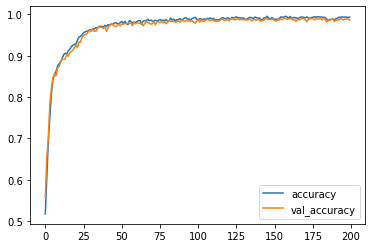

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [19]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [22]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

In [23]:
r = model.fit(inputs, Y, epochs=200, validation_split=0.5,)

Epoch 1/200
79/79 [==============================] - 5s 13ms/step - loss: 0.6946 - accuracy: 0.4840 - val_loss: 0.6937 - val_accuracy: 0.4892
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6948 - accuracy: 0.4956 - val_loss: 0.6938 - val_accuracy: 0.4996
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4932 - val_loss: 0.6937 - val_accuracy: 0.4940
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 5/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.4928 - val_loss: 0.6943 - val_accuracy: 0.4980
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5116 - val_loss: 0.6935 - val_accuracy: 0.5068
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5260 - val_loss: 0.6842 - val_accuracy: 0.5240
Epoch 8/200


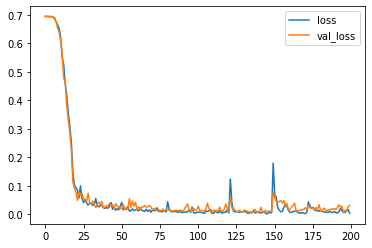

In [24]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

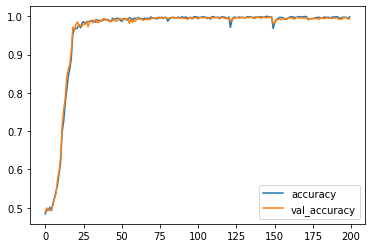

In [25]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [27]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

In [28]:
r = model.fit(inputs, Y, epochs=200, validation_split=0.5,)

Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.7070 - accuracy: 0.4976 - val_loss: 0.6979 - val_accuracy: 0.4936
Epoch 2/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.5124 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6933 - accuracy: 0.5116 - val_loss: 0.6984 - val_accuracy: 0.4976
Epoch 4/200
79/79 [==============================] - 2s 29ms/step - loss: 0.6931 - accuracy: 0.5236 - val_loss: 0.7004 - val_accuracy: 0.5048
Epoch 5/200
79/79 [==============================] - 2s 26ms/step - loss: 0.6916 - accuracy: 0.5228 - val_loss: 0.6935 - val_accuracy: 0.5176
Epoch 6/200
79/79 [==============================] - 2s 29ms/step - loss: 0.6881 - accuracy: 0.5476 - val_loss: 0.7198 - val_accuracy: 0.5164
Epoch 7/200
79/79 [==============================] - 3s 32ms/step - loss: 0.6858 - accuracy: 0.5492 - val_loss: 0.6715 - val_accuracy: 0.5888
Epoch 

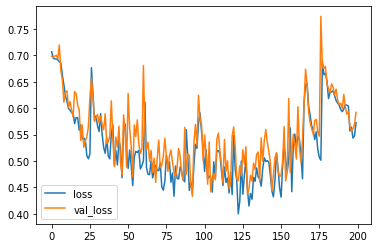

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

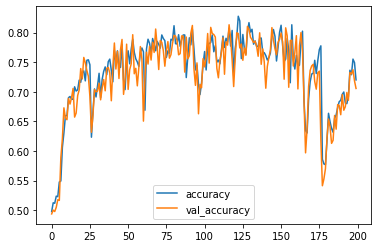

In [30]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [31]:
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [33]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=200, validation_split=0.5,)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.6940 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6942 - val_accuracy: 0.4964
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6941 - accuracy: 0.5096 - val_loss: 0.6962 - val_accuracy: 0.4924
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6959 - val_accuracy: 0.4968
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5128 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4928 - val_loss: 0.6949 - val_accuracy: 0.4936
Epoch 8/200


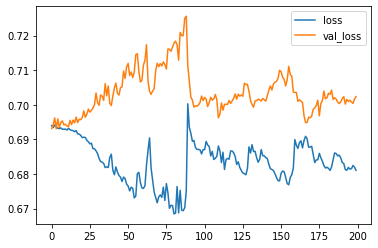

In [34]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

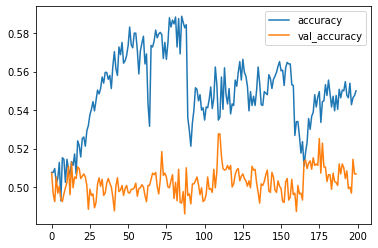

In [35]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [37]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=200, validation_split=0.5,)

Epoch 1/200
79/79 [==============================] - 3s 14ms/step - loss: 0.6941 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.4992
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6946 - val_accuracy: 0.4940
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5088 - val_loss: 0.6923 - val_accuracy: 0.4784
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6889 - accuracy: 0.5256 - val_loss: 0.6822 - val_accuracy: 0.5056
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6855 - accuracy: 0.5280 - val_loss: 0.6906 - val_accuracy: 0.5192
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6803 - accuracy: 0.5332 - val_loss: 0.6723 - val_accuracy: 0.5632
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6660 - accuracy: 0.5796 - val_loss: 0.6669 - val_accuracy: 0.5540
Epoch 8/200


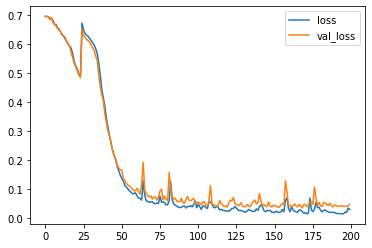

In [38]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

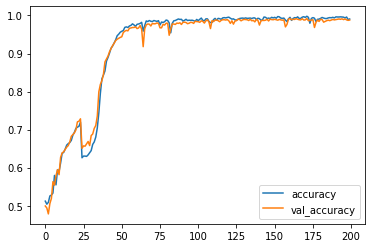

In [39]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [43]:
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=400, validation_split=0.5,)

Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.6940 - accuracy: 0.5112 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 0.6939 - val_accuracy: 0.4972
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5172 - val_loss: 0.6962 - val_accuracy: 0.4908
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5272 - val_loss: 0.6927 - val_accuracy: 0.5044
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5064 - val_loss: 0.6930 - val_accuracy: 0.4968
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6918 - accuracy: 0.5120 - val_loss: 0.6955 - val_accuracy: 0.4976
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6923 - accuracy: 0.5196 - val_loss: 0.6929 - val_accuracy: 0.5140
Epoch 8/200


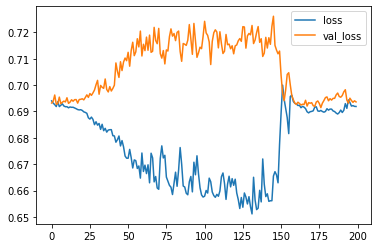

In [44]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

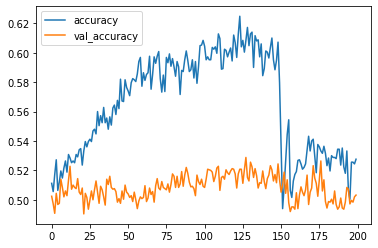

In [45]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [46]:
inputs = np.expand_dims(X, -1)
 
i = Input(shape=(T,D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(learning_rate = 0.01),
              metrics=['accuracy'])

r = model.fit(inputs, Y, epochs=400, validation_split=0.5,)

Epoch 1/400
79/79 [==============================] - 3s 12ms/step - loss: 0.6937 - accuracy: 0.5012 - val_loss: 0.6928 - val_accuracy: 0.5084
Epoch 2/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6928 - val_accuracy: 0.5076
Epoch 3/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6962 - val_accuracy: 0.4904
Epoch 4/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6928 - val_accuracy: 0.5016
Epoch 5/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5172 - val_loss: 0.6948 - val_accuracy: 0.4920
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6946 - val_accuracy: 0.4900
Epoch 7/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5184 - val_loss: 0.6924 - val_accuracy: 0.5116
Epoch 8/400


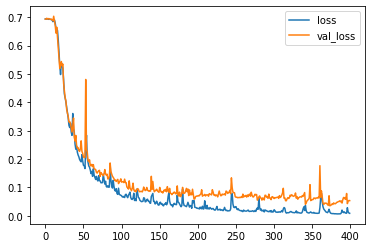

In [47]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

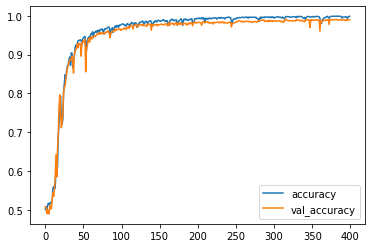

In [48]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()